<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin-data.csv')

print(df) 

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [13]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [15]:
df.drop(['Unnamed: 32','id'], inplace = True, axis=1)

In [17]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
M=0, B=1

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2358002498.py, line 1)

In [61]:
diagnosis_map = {
    'B':0,
    'M':1
}
df['diagnosis'] = df['diagnosis'].map(diagnosis_map)
                 

In [51]:
df.head ()

,diagnosis,value
0,NaN,0
1,0.0,2
2,NaN,0
3,0.0,5


In [63]:
df.column = df['diagnosis'].columns.str.replace('M','1')
.str.replace ('8', '0')
return df
df= clean_column(df)
print(df.columns)


SyntaxError: invalid syntax (4285631701.py, line 2)

In [67]:
import pandas as pd

# Example DataFrame
data = {
    'diagnosis': ['M', 'B', 'M', 'B'],
    'value': ['8', '2', '8', '5']
}

df = pd.DataFrame(data)

# Function to clean column
def clean_column(df):
    # Replace 'M' with '1' and '8' with '0' in 'diagnosis' column
    df['diagnosis'] = df['diagnosis'].str.replace('M', '1')
    df['value'] = df['value'].str.replace('8', '0')
    return df

# Apply the cleaning function
df = clean_column(df)

# Print the DataFrame columns
print(df.columns)


Index(['diagnosis', 'value'], dtype='object')


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [43]:
# predict test class:
#diagnosis to 0&1 e.g. 0=M, 1 = B
# y (target) is diagnosis
# X (feature columns) = ?? all?? or start with a few based of matrix
# split (test,train)
# model =logisticRegression()
# predicted test probability:

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Example DataFrame
data = {
    'diagnosis': ['M', 'B', 'M', 'B', 'M'],
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1]
}
df = pd.DataFrame(data)

# Encode 'diagnosis' as binary
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Define feature columns (example: using all columns except the target)
X = df[['feature1', 'feature2']]
y = df['diagnosis']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

print("Predicted probabilities:", y_pred_prob)


Predicted probabilities: [0.69746034 0.75541   ]


#### 3.3 Create the confusion matrix for your classifier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [83]:
# ANSWER
import pandas as pd
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Convert the confusion matrix to a DataFrame
cm_df = pd.DataFrame(cm, 
                     columns=['predicted_healthy', 'predicted_cancer'], 
                     index=['is_healthy', 'is_cancer'])

print(cm_df)


            predicted_healthy  predicted_cancer
is_healthy                  0                 1
is_cancer                   0                 1


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [ ]:
# ANSWER
# use float to perform true division, not integer division

#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [ ]:
# ANSWER

In [87]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Convert confusion matrix to DataFrame
cm_df = pd.DataFrame(cm, 
                     columns=['predicted_healthy', 'predicted_cancer'], 
                     index=['is_healthy', 'is_cancer'])

print("Confusion Matrix:")
print(cm_df)

# Extract values from confusion matrix
TP = cm_df.loc['is_cancer', 'predicted_cancer']
TN = cm_df.loc['is_healthy', 'predicted_healthy']
FP = cm_df.loc['is_healthy', 'predicted_cancer']
FN = cm_df.loc['is_cancer', 'predicted_healthy']

# Calculate classification accuracy
accuracy = (TP + TN) / float(TP + TN + FP + FN)

print(f"Classification Accuracy: {accuracy:.2f}")


Confusion Matrix:
            predicted_healthy  predicted_cancer
is_healthy                  0                 1
is_cancer                   0                 1
Classification Accuracy: 0.50


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [105]:
#answer


# Calculate Sensitivity
sensitivity = TP / float(TP + FN)

print(f"Sensitivity: {sensitivity:.2f}")


Sensitivity: 1.00


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [107]:
# ANSWER
# Calculate Specificity
specificity = TN / float(TN + FP)

print(f"Specificity: {specificity:.2f}")


Specificity: 0.00


#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [111]:
# ANSWER

# Calculate False Positive Rate
false_positive_rate = FP / float(TN + FP)

print(f"False Positive Rate: {false_positive_rate:.2f}")


False Positive Rate: 1.00


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [113]:
#ANSWER
# Calculate Precision
precision = TP / float(TP + FP)

print(f"Precision: {precision:.2f}")


Confusion Matrix:
            predicted_healthy  predicted_cancer
is_healthy                  0                 1
is_cancer                   0                 1
Precision: 0.50


#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [115]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns:)
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example DataFrame
data = {
    'diagnosis': ['M', 'B', 'M', 'B', 'M'],
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1]
}
df = pd.DataFrame(data)

# Encode 'diagnosis' as binary
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Define feature columns and target
X = df[['feature1', 'feature2']]
y = df['diagnosis']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)

# Create DataFrame with columns 'class_0_pp' and 'class_1_pp'
prob_df = pd.DataFrame(y_prob, columns=['class_0_pp', 'class_1_pp'])

print("Predicted Test Probabilities DataFrame:")
print(prob_df)


Predicted Test Probabilities DataFrame:
   class_0_pp  class_1_pp
0     0.30254     0.69746
1     0.24459     0.75541


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [117]:
from sklearn.metrics import roc_curve, auc

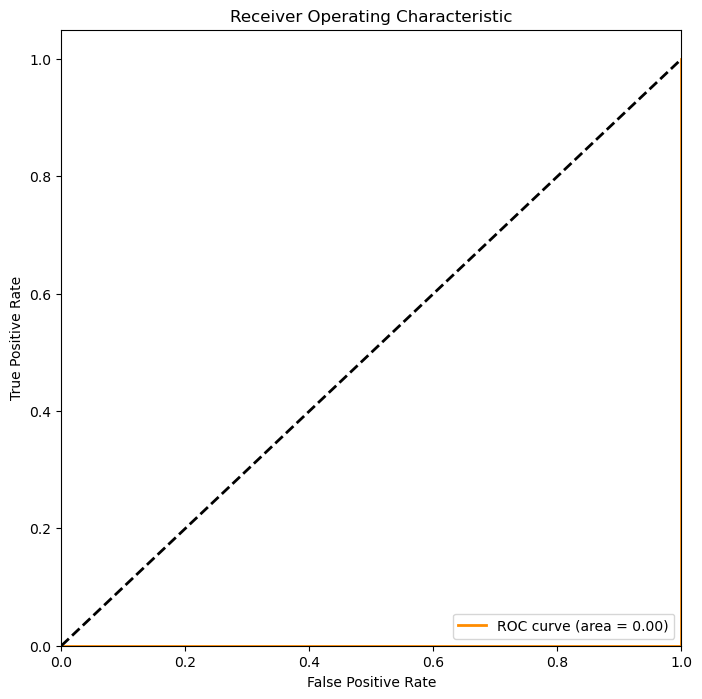

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and ROC area for class 1 (positive class)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---





In [ ]:
Manual Calculation of Classification Metrics with Different Thresholds
This exercise aims to help you understand how changing the decision threshold affects your classification metrics. Follow the steps below:

Steps to Follow:
Predict Probabilities: Use your trained classification model to predict the probabilities for the positive class on the test data (using the function predict_proba in here).
Set a Threshold and Manually Calculate Predictions: Set a threshold for classifying the probabilities and manually classify the predicted probabilities into positive and negative classes based on this threshold.

    Manually Calculate the Confusion Matrix: Compare your manually classified predictions with the actual values and calculate the number of True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN).

    Calculate Metrics Manually: Use functions to calculate precision, recall, accuracy, and other metrics.

    Plot Metrics for Different Thresholds: Evaluate the metrics at different thresholds and plot these metrics to see how the threshold affects the results.t-learn




In [ ]:
Exercise 3: Manually Calculating the ROC Curve and AUC
Steps to Follow:
Calculate TPR and FPR for Various Thresholds:
  Compute True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN).
  Calculate True Positive Rate (TPR)
 TPR = TP / (TP + FN)
 False Positive Rate (FPR):
- FPR = FP / (FP + TN)
Plot the ROC Curve
Plot FPR on the x-axis and TPR on the y-axis for each threshold.
Calculate the AUC Manually
Approximate AUC by summing the areas of trapezoids formed under the ROC curve
 AUC = Σ [ 1/2 * (FPR_i - FPR_(i-1)) * (TPR_i + TPR_(i-1)) ]

In [190]:
TN = 69
FP =3
TP = 30
FN =12

In [192]:
TPR = TP / (TP+FN)
TPR

0.7142857142857143

In [194]:
FPR = FP / (FP + TN)
FPR

0.041666666666666664

In [196]:
Recall = TP / (TP+FN)
Recall

0.7142857142857143

In [ ]:
Accuracy = (TP